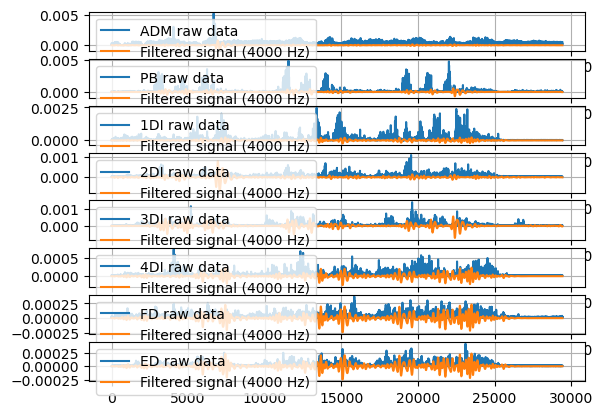

filtered data length:  29429


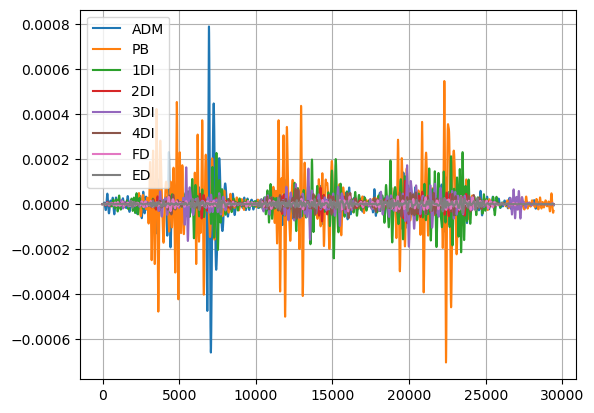

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import pandas as pd
import csv

from scipy.signal import butter, lfilter, filtfilt, sosfilt, sosfreqz, freqz

# from scipy import signal


""" Read EMG from .csv file """
def read_emg(csv_file):
    EMG_data = pd.read_csv(csv_file)
    timestamp = EMG_data.iloc[:, 0].to_numpy()
    muscle1_ADM = EMG_data.iloc[:, 1].to_numpy()
    muscle2_PB = EMG_data.iloc[:, 2].to_numpy()
    muscle3_1DI = EMG_data.iloc[:, 3].to_numpy()
    muscle4_2DI = EMG_data.iloc[:, 4].to_numpy()
    muscle5_3DI = EMG_data.iloc[:, 5].to_numpy()
    muscle6_4DI = EMG_data.iloc[:, 6].to_numpy()
    muscle10_FD = EMG_data.iloc[:, 12].to_numpy()
    muscle12_ED = EMG_data.iloc[:, 13].to_numpy()
    return muscle1_ADM, muscle2_PB, muscle3_1DI, muscle4_2DI, muscle5_3DI,muscle6_4DI,muscle10_FD,muscle12_ED


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y


def run():
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 4000.0
    lowcut = 10.0
    highcut = 24.0

    # muscle1, muscle2, muscle3 = read_emg('C:/Users/koikePiano/Desktop/UIST24/EMG+keymotion_dataset/20240115-CSL/Task1_onlyThumb/1/core_output_EMG.csv')
    muscle1_ADM, muscle2_PB, muscle3_1DI, muscle4_2DI, muscle5_3DI, muscle6_4DI, muscle10_FD, muscle12_ED = read_emg('data/climb_0/raw/emg/core_output_EMG.csv')
    
  
    C = len(muscle1_ADM)
    t = np.arange(C)

      
    y = butter_bandpass_filter(muscle1_ADM, lowcut, highcut, fs, order=5)
    y2 = butter_bandpass_filter(muscle2_PB, lowcut, highcut, fs, order=5)
    y3 = butter_bandpass_filter(muscle3_1DI, lowcut, highcut, fs, order=5)
    y4 = butter_bandpass_filter(muscle4_2DI, lowcut, highcut, fs, order=5)
    y5 = butter_bandpass_filter(muscle5_3DI, lowcut, highcut, fs, order=5)
    y6 = butter_bandpass_filter(muscle6_4DI, lowcut, highcut, fs, order=5)
    y7 = butter_bandpass_filter(muscle10_FD, lowcut, highcut, fs, order=5)
    y8 = butter_bandpass_filter(muscle12_ED, lowcut, highcut, fs, order=5)

    '''  ------------------------------------------------------------------visualize raw and filtered muscle emg---------------------------------------------------------------------------------------------- '''
 
    ax1 = plt.subplot(811)
    ax1.plot(t, muscle1_ADM, label='ADM raw data')
    ax1.plot(t, y, label='Filtered signal (%g Hz)' % fs)
    ax1.grid(True)
    ax1.axis('tight')
    ax1.legend(loc='upper left')

    ax2 = plt.subplot(812)
    ax2.plot(t, muscle2_PB, label='PB raw data')
    ax2.plot(t, y2, label='Filtered signal (%g Hz)' % fs)
    ax2.grid(True)
    ax2.axis('tight')
    ax2.legend(loc='upper left')

    ax3 = plt.subplot(813)
    ax3.plot(t, muscle3_1DI, label='1DI raw data')
    ax3.plot(t, y3, label='Filtered signal (%g Hz)' % fs)
    ax3.grid(True)
    ax3.axis('tight')
    ax3.legend(loc='upper left')

    ax4 = plt.subplot(814)
    ax4.plot(t, muscle4_2DI, label='2DI raw data')
    ax4.plot(t, y, label='Filtered signal (%g Hz)' % fs)
    ax4.grid(True)
    ax4.axis('tight')
    ax4.legend(loc='upper left')

    ax5 = plt.subplot(815)
    ax5.plot(t, muscle5_3DI, label='3DI raw data')
    ax5.plot(t, y2, label='Filtered signal (%g Hz)' % fs)
    ax5.grid(True)
    ax5.axis('tight')
    ax5.legend(loc='upper left')

    ax6 = plt.subplot(816)
    ax6.plot(t, muscle6_4DI, label='4DI raw data')
    ax6.plot(t, y3, label='Filtered signal (%g Hz)' % fs)
    ax6.grid(True)
    ax6.axis('tight')
    ax6.legend(loc='upper left')

    ax7 = plt.subplot(817)
    ax7.plot(t, muscle10_FD, label='FD raw data')
    ax7.plot(t, y3, label='Filtered signal (%g Hz)' % fs)
    ax7.grid(True)
    ax7.axis('tight')
    ax7.legend(loc='upper left')
    
    ax8 = plt.subplot(818)
    ax8.plot(t, muscle12_ED, label='ED raw data')
    ax8.plot(t, y3, label='Filtered signal (%g Hz)' % fs)
    ax8.grid(True)
    ax8.axis('tight')
    ax8.legend(loc='upper left')

    plt.show()
    
    print("filtered data length: ", len(y))
    '''  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- '''

    
    ax9 = plt.subplot(111)
    ax9.plot(t, y, label='ADM')
    ax9.plot(t, y2, label='PB')
    ax9.plot(t, y3, label='1DI')
    ax9.plot(t, y4, label='2DI')
    ax9.plot(t, y5, label='3DI')
    ax9.plot(t, y6, label='4DI')
    ax9.plot(t, y7, label='FD')
    ax9.plot(t, y8, label='ED')
    ax9.grid(True)
    ax9.axis('tight')
    ax9.legend(loc='upper left')

    plt.show()
    



run()